# Preprocessing function

Illustration of effects is on https://gitee.com/alavaien/imgaug


In [1]:
!pip install imgaug

In [2]:
import numpy as np
from imgaug import augmenters as iaa
from skimage import exposure
import cv2
import random
    
def normalize(x):
    return (x / 255.0).copy()
    
def denormalize(x):
    return (x * 255.0).copy()


def perform_crop(x):
    if np.random.random() < 1:
        # crops image from each side by 0 to int(magnitude * 32) pixels
        magnitude = 0.5
        x = iaa.Crop(px=(0, int(magnitude * 32))).augment_images(x)
        # x = np.clip(x, 0, 255)
    return x

def perfrom_gaussian_blur(x):
    if np.random.random() < 1:
        # blurs image with sigma of 0 to magnitude * 25.0
        magnitude = 3.0/25.0
        x = iaa.GaussianBlur(sigma=(0, magnitude * 25.0)).augment_images(x)
    return x

def perform_shear(x):
    if np.random.random() < 1:
        # shear image
        magnitude = 0.3
        x = iaa.Affine(shear=(-90 * magnitude, 90 * magnitude)).augment_images(x)
    return x

def perform_translate_x(x):
    if np.random.random() < 1:
        # translate_x 
        magnitude = 0.5
        x = iaa.Affine(translate_percent={"x": (-magnitude, magnitude), "y": (0, 0)}).augment_images(x)
    return x

def perform_translate_y(x):
    if np.random.random() < 1:
        # translate_y 
        magnitude = 0.5
        x = iaa.Affine(translate_percent={"x": (0, 0), "y": (-magnitude, magnitude)}).augment_images(x)
    return x

def perform_horizontal_flip(x):
    if np.random.random() < 1:
        magnitude = 1.0
        x = iaa.Fliplr(magnitude).augment_images(x)
    return x
        
def perform_vertical_flip(x):
    if np.random.random() < 1:
        magnitude = 1.0
        x = iaa.Flipud(magnitude).augment_images(x)
    return x

def perform_sharpen(x):
    if np.random.random() < 1:
        # sharpen image 
        magnitude = 0.3
        x = iaa.Sharpen(alpha=(0, 1.0), lightness=(0.50, 5 * magnitude)).augment_images(x)
    return x

def perform_emboss(x):
    if np.random.random() < 1:
        # add emboss effect to image
        magnitude = 0.1
        x = iaa.Emboss(alpha=(0, 1.0), strength=(0.0, 20.0 * magnitude)).augment_images(x)
    return x

def perform_additive_gaussian_noise(x):
    if np.random.random() < 1:
        # additive gaussian noise
        magnitude = 0.5
        x = iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, magnitude * 255), per_channel=0.5).augment_images(x)
    return x
        
def perform_dropout(x):
    if np.random.random() < 1:
        # drop randomly 1 to magnitude*100% of all pixels (set them to black)
        magnitude = 0.1
        x = iaa.Dropout((0.01, max(0.011, magnitude)), per_channel=0.5).augment_images(x)
    return x

def perform_coarse_dropout(x):
    if np.random.random() < 1:
        # similar to Gridmask, drop between 3 to 15% of pixels by removing rectangels of 30 to 
        # np.log10(magnitude * 3)*100% of the size of original image
        magnitude = 1.1
        x = iaa.CoarseDropout((0.03, 0.15), size_percent=(0.30, np.log10(magnitude * 3)), per_channel=0.2).augment_images(x)
    return x

def perform_gamma_contrast(x):
    if np.random.random() < 1:
        # gamma contrast
        magnitude = 1.0
        X_norm = normalize(x)
        X_aug_norm = iaa.GammaContrast(magnitude * 1.75).augment_images(X_norm)  # needs 0-1 values
        x = denormalize(X_aug_norm)
    return x

def perform_brighten(x):
    if np.random.random() < 1:
        # add a value of (int(-40 * magnitude) to (int(40 * magnitude) to each pixel
        magnitude = 1.0
        x = iaa.Add((int(-40 * magnitude), int(40 * magnitude)), per_channel=0.5).augment_images(x)  # brighten
    return x

def perform_invert(x):
    if np.random.random() < 1:
        x = iaa.Invert(1.0).augment_images(x.astype(np.uint8))
    return x

def perform_all_channel_histogram_equalization(x):
    if np.random.random() < 1:
        x = iaa.AllChannelsHistogramEqualization().augment_images(x.astype(np.uint8))
    return x

def perform_superpixels(x):
    if np.random.random() < 1:
        magnitude = 1.0
        x = iaa.Superpixels(p_replace=(0, magnitude), n_segments=(100, 100)).augment_images(x.astype(np.uint8))
    return x

def perform_perspective_transform(x):
    if np.random.random() < 1:
        # perspective transform
        magnitude = 0.075
        X_norm = normalize(x)
        X_aug_norm = iaa.PerspectiveTransform(scale=(0.01, max(0.02, magnitude))).augment_images(X_norm) 
        # first scale param must be larger
        np.clip(X_aug_norm, 0.0, 1.0, out=X_aug_norm)
        x = denormalize(X_aug_norm)
    return x

def perform_elastic_transform(x):
    if np.random.random() < 1:
        # elastic transformation
        magnitude = 0.25
        X_norm = normalize(x)
        X_norm2 = (X_norm * 2) - 1
        X_aug_norm2 = iaa.ElasticTransformation(alpha=(0.0, max(0.5, magnitude * 300)), sigma=5.0).augment_images(X_norm2)
        X_aug_norm = (X_aug_norm2 + 1) / 2
        x = denormalize(X_aug_norm)
    return x

def perform_add_to_hue_and_saturation(x):
    if np.random.random() < 1:
        # add to hue and saturation
        magnitude = 1.0
        x = iaa.AddToHueAndSaturation((int(-45 * magnitude), int(45 * magnitude))).augment_images(x.astype(np.uint8))
    return x

def perform_coarse_salt_and_pepper(x):
    if np.random.random() < 1:
        # coarse salt and pepper
        magnitude = 0.3
        x = iaa.CoarseSaltAndPepper(p=0.2, size_percent=magnitude).augment_images(x)
    return x

def perform_grayscale(x):
    if np.random.random() < 1:
        magnitude = 1.0
        x = iaa.Grayscale(alpha=(0.0, magnitude)).augment_images(x.astype(np.uint8))
    return x

def perform_fog(x):
    if np.random.random() < 1:
        x = iaa.Fog().augment_images(x)
    return x

def perform_clouds(x):
    if np.random.random() < 1:
        x = iaa.Clouds().augment_images(x)
    return x

def perform_rotate(x):
    if np.random.random() < 1:
        magnitude = 1.0
        x = iaa.Affine(rotate=(-180 * magnitude, 180 * magnitude)).augment_images(x)
    return x

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def display_augmented_bach(aug_function):

    datagen_train = ImageDataGenerator()
    train_data = datagen_train.flow_from_directory('flow_test', target_size=(224, 224), batch_size = 4)

    augmented = aug_function(train_data.next()[0])

    fig, axe = plt.subplots(1, 4, figsize = (15, 60))
    for i, aug_img in enumerate(augmented):
    # for j,l in enumerate(train_data.next()[0]):
        axe[i].imshow(aug_img.astype(int), interpolation="nearest")
        axe[i].set_xticks([])
        axe[i].set_yticks([])
    plt.show()

Found 6 images belonging to 2 classes.


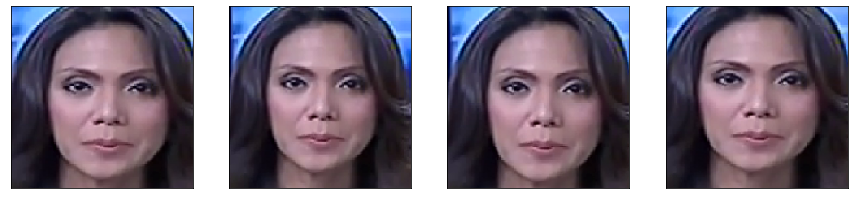

In [5]:
display_augmented_bach(perform_crop)

Found 6 images belonging to 2 classes.


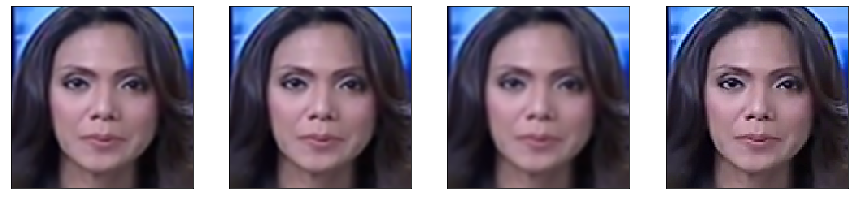

In [6]:
display_augmented_bach(perfrom_gaussian_blur)

Found 6 images belonging to 2 classes.


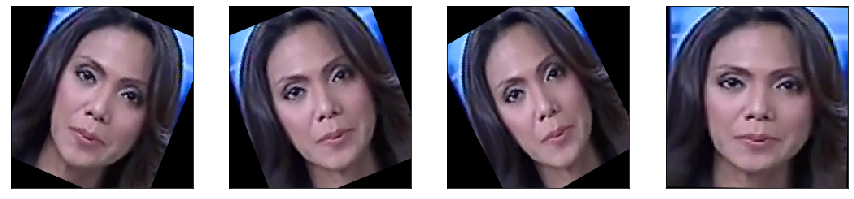

In [7]:
display_augmented_bach(perform_shear)

Found 6 images belonging to 2 classes.


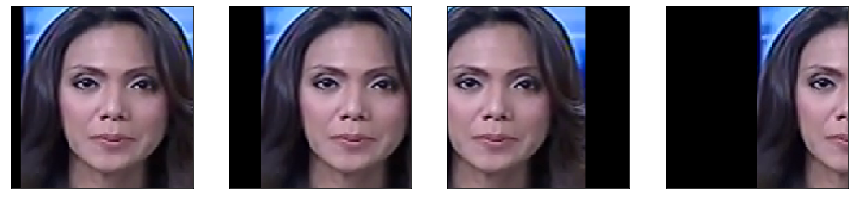

In [8]:
display_augmented_bach(perform_translate_x)

Found 6 images belonging to 2 classes.


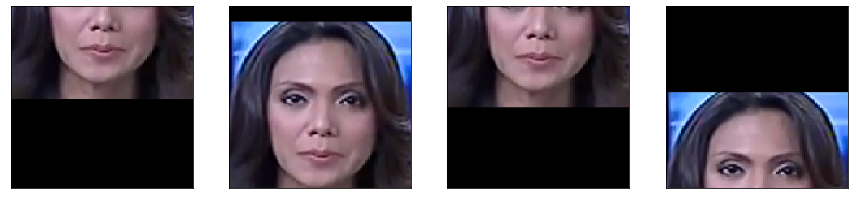

In [9]:
display_augmented_bach(perform_translate_y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 6 images belonging to 2 classes.


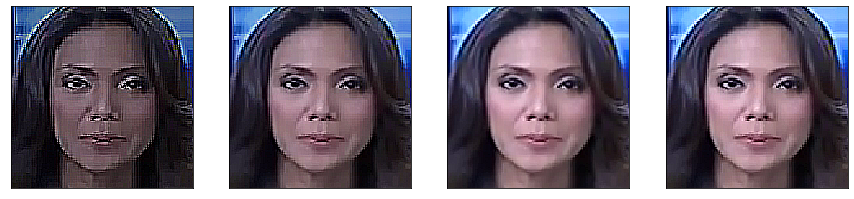

In [10]:
display_augmented_bach(perform_sharpen)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 6 images belonging to 2 classes.


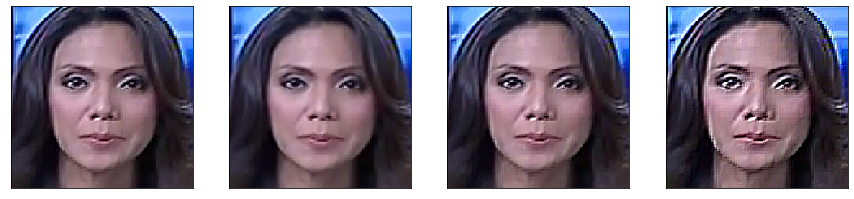

In [11]:
display_augmented_bach(perform_emboss)

Found 6 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


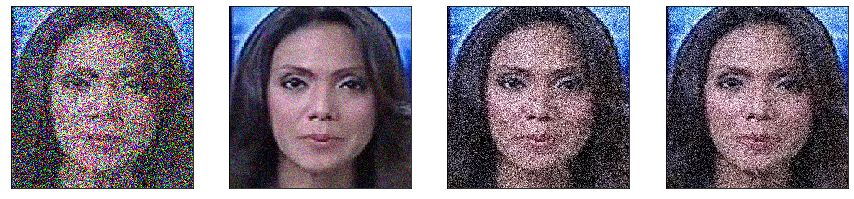

In [12]:
display_augmented_bach(perform_additive_gaussian_noise)

Found 6 images belonging to 2 classes.


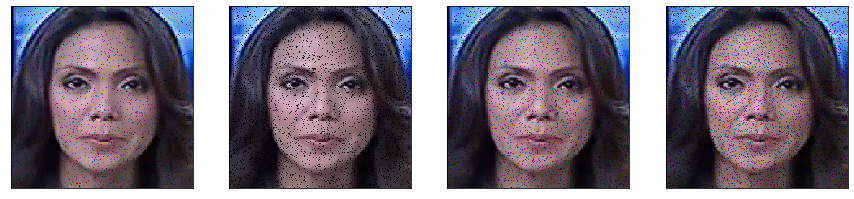

In [13]:
display_augmented_bach(perform_dropout)

Found 6 images belonging to 2 classes.


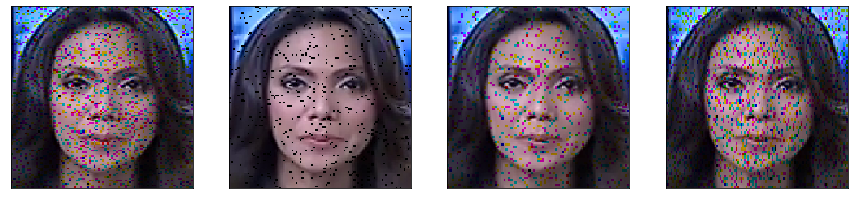

In [14]:
display_augmented_bach(perform_coarse_dropout)

Found 6 images belonging to 2 classes.


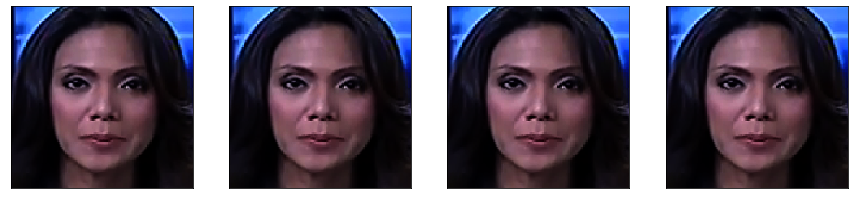

In [15]:
display_augmented_bach(perform_gamma_contrast)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 6 images belonging to 2 classes.


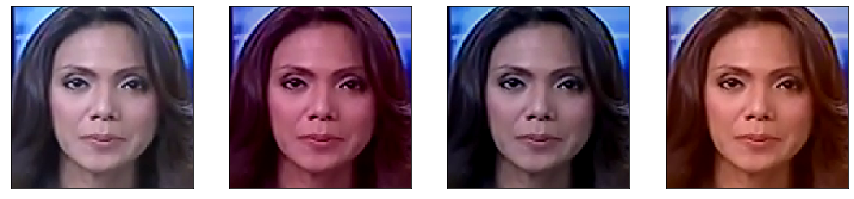

In [16]:
display_augmented_bach(perform_brighten)

Found 6 images belonging to 2 classes.


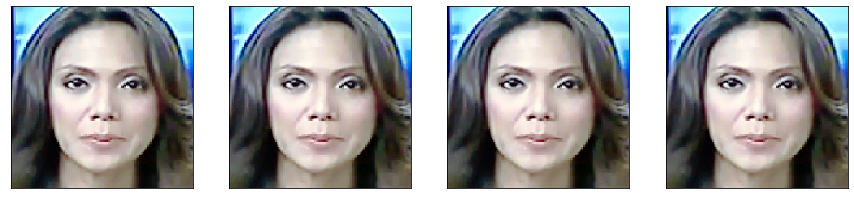

In [17]:
display_augmented_bach(perform_all_channel_histogram_equalization)

Found 6 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


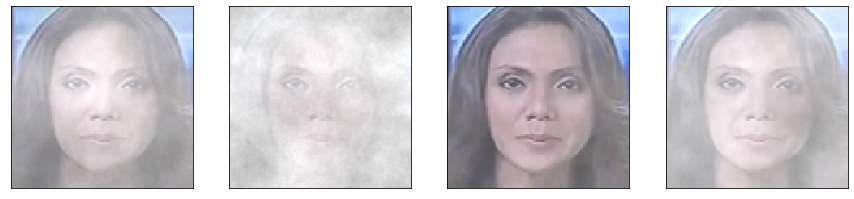

In [18]:
display_augmented_bach(perform_fog)

Found 6 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


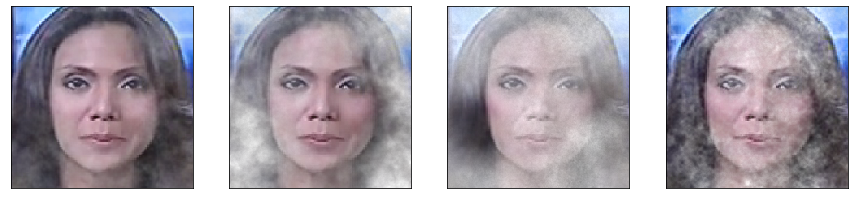

In [19]:
display_augmented_bach(perform_clouds)

Found 6 images belonging to 2 classes.


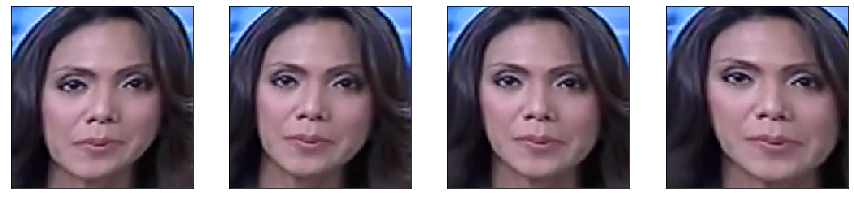

In [20]:
display_augmented_bach(perform_perspective_transform)

Found 6 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


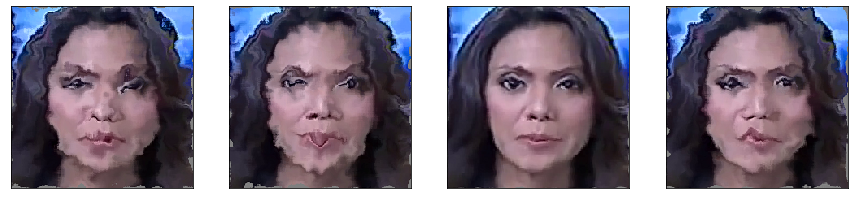

In [21]:
display_augmented_bach(perform_elastic_transform)

Found 6 images belonging to 2 classes.


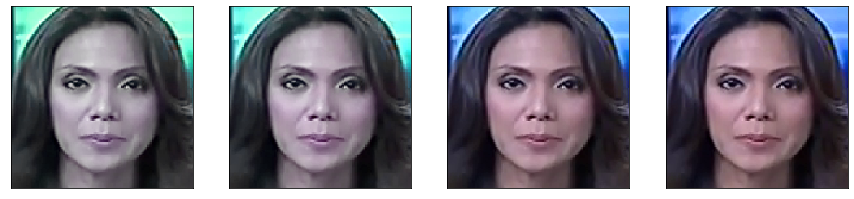

In [22]:
display_augmented_bach(perform_add_to_hue_and_saturation)

Found 6 images belonging to 2 classes.


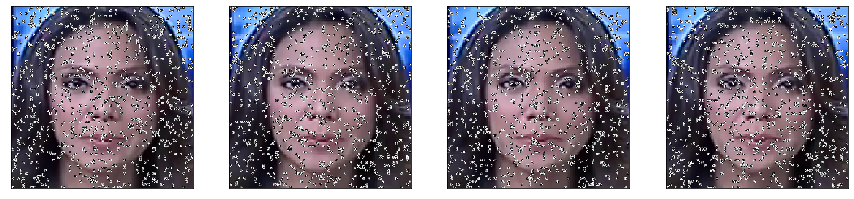

In [23]:
display_augmented_bach(perform_coarse_salt_and_pepper)

Found 6 images belonging to 2 classes.


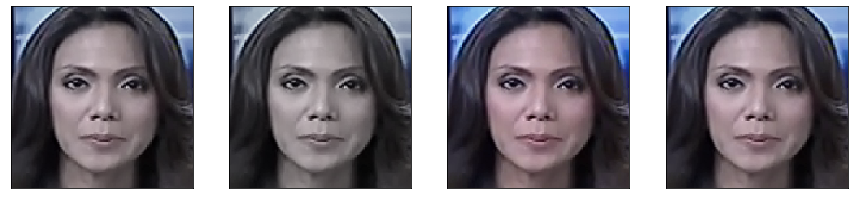

In [24]:
display_augmented_bach(perform_grayscale)

Found 6 images belonging to 2 classes.


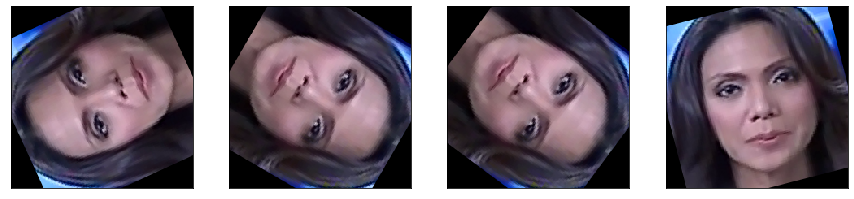

In [25]:
display_augmented_bach(perform_rotate)

Found 6 images belonging to 2 classes.


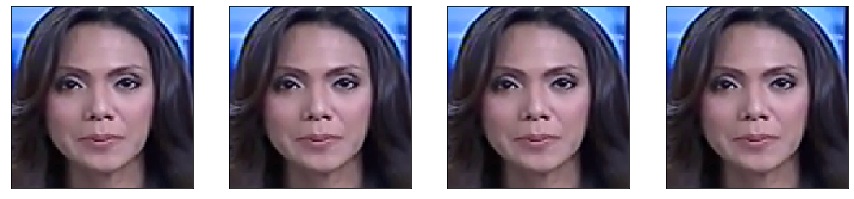

In [26]:
display_augmented_bach(perform_horizontal_flip)

Found 6 images belonging to 2 classes.


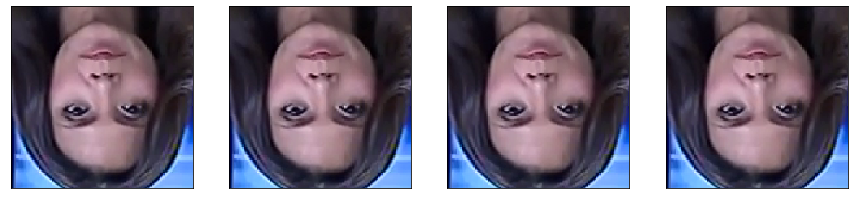

In [27]:
display_augmented_bach(perform_vertical_flip)

Found 6 images belonging to 2 classes.


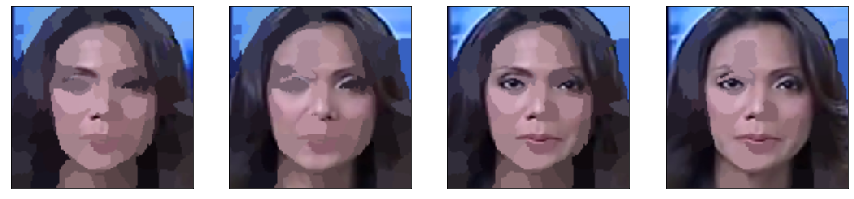

In [28]:
display_augmented_bach(perform_superpixels)

Found 6 images belonging to 2 classes.


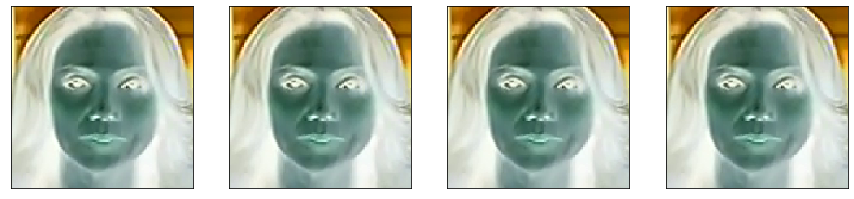

In [29]:
display_augmented_bach(perform_invert)

Found 6 images belonging to 2 classes.


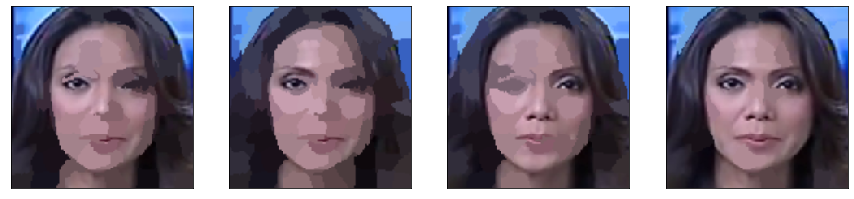

In [30]:
display_augmented_bach(perform_superpixels)